In [8]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords

# --- FIX: Download the NLTK stopwords data ---
# You only need to run this download command once. 
# After the first successful run, you can comment it out.
nltk.download('stopwords')

# --- Your Code (Slightly Cleaned) ---

# Load the Excel file once
df = pd.read_excel("C:\\Users\\Administrator\\Desktop\\dataset_google-play-scraper_2025-08-26_07-17-00-600.xlsx")

# 1. Remove missing rows from the 'text' column
# Making sure the 'text' column exists and handling potential errors
if 'text' in df.columns:
    df.dropna(subset=['text'], inplace=True)

    # 2. Make the 'text' column lowercase
    df['lowercase_text'] = df['text'].astype(str).str.lower()

    # 3. Remove special characters
    df['no_special_chars_text'] = df['lowercase_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

    # 4. Tokenize the text
    df['tokenized_text'] = df['no_special_chars_text'].str.split()

    # 5. Remove stopwords
    stop_words = set(stopwords.words('english'))
    df['clean_text'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

    # Display the first 5 rows with the new columns
    print(df[['text', 'lowercase_text', 'no_special_chars_text', 'tokenized_text', 'clean_text']].head())
else:
    print("Error: 'text' column not found in the DataFrame.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


                                                text  \
0  I just love Myntra for my personal reasons, qu...   
1   superb app...good experience. very fast delivery   
2              original products with good discounts   
3                          it's very easy to use app   
4  very very slow deliver products, one product t...   

                                      lowercase_text  \
0  i just love myntra for my personal reasons, qu...   
1   superb app...good experience. very fast delivery   
2              original products with good discounts   
3                          it's very easy to use app   
4  very very slow deliver products, one product t...   

                               no_special_chars_text  \
0  i just love myntra for my personal reasons qua...   
1       superb appgood experience very fast delivery   
2              original products with good discounts   
3                           its very easy to use app   
4  very very slow deliver products one product

In [8]:
 Define the name for your new Excel file
output_filename = 'preprocessed_google_play_data.xlsx'

# Save the DataFrame to an Excel file
# We use index=False to avoid writing the DataFrame's index as a column in the Excel file
df.to_excel(output_filename, index=False)

print(f"Successfully saved the updated data to '{output_filename}'")
print("You can find this file in the same directory as your Jupyter Notebook.")
        

SyntaxError: invalid syntax (4219123214.py, line 1)

In [10]:
# Define the name for your new Excel file
output_filename = 'preprocessed_google_play_data.xlsx'

# Save the DataFrame to an Excel file
# We use index=False to avoid writing the DataFrame's index as a column in the Excel file
df.to_excel(output_filename, index=False)

print(f"Successfully saved the updated data to '{output_filename}'")
print("You can find this file in the same directory as your Jupyter Notebook.")

Successfully saved the updated data to 'preprocessed_google_play_data.xlsx'
You can find this file in the same directory as your Jupyter Notebook.


In [12]:
# --- Step 1: Import all necessary libraries ---
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords

# --- Step 2: Download the stopwords data from NLTK ---
# You only need to run this download command once. 
# If you have already run it successfully, you can comment this line out.
nltk.download('stopwords')

# --- Step 3: Load your original Excel file ---
try:
    df = pd.read_excel("C:\\Users\\Administrator\\Desktop\\dataset_google-play-scraper_2025-08-26_07-17-00-600.xlsx")

    # --- Step 4: Perform ALL preprocessing steps sequentially ---

    # Operation 1: Remove missing rows
    # This removes rows where the 'text' column is empty. It does not create a new column.
    df.dropna(subset=['text'], inplace=True)

    # Operation 2: Make Text Lowercase
    # Creates the 'lowercase_text' column
    df['lowercase_text'] = df['text'].astype(str).str.lower()

    # Operation 3: Remove Special Characters
    # Creates the 'no_special_chars_text' column
    df['no_special_chars_text'] = df['lowercase_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

    # Operation 4: Tokenize It
    # Creates the 'tokenized_text' column
    df['tokenized_text'] = df['no_special_chars_text'].str.split()

    # Operation 5: Remove Stopwords
    # Creates the final 'clean_text' column
    stop_words = set(stopwords.words('english'))
    df['clean_text'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

    # --- Step 5: Save the fully processed DataFrame to a NEW Excel file ---
    output_filename = 'preprocessed_google_play_data_complete.xlsx'
    df.to_excel(output_filename, index=False)

    print(f"SUCCESS: All preprocessing steps are complete.")
    print(f"The updated data has been saved to the file: '{output_filename}'")
    
    # Display a preview of the final DataFrame that was saved
    print("\nPreview of the first 5 rows of the saved data:")
    print(df.head())

except FileNotFoundError:
    print("ERROR: The file was not found. Please double-check the file path.")
except KeyError:
    print("ERROR: A column named 'text' was not found in the Excel file.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


SUCCESS: All preprocessing steps are complete.
The updated data has been saved to the file: 'preprocessed_google_play_data_complete.xlsx'

Preview of the first 5 rows of the saved data:
                                                text  thumbsUp  \
0  I just love Myntra for my personal reasons, qu...         0   
1   superb app...good experience. very fast delivery         0   
2              original products with good discounts         0   
3                          it's very easy to use app         0   
4  very very slow deliver products, one product t...         0   

                                      lowercase_text  \
0  i just love myntra for my personal reasons, qu...   
1   superb app...good experience. very fast delivery   
2              original products with good discounts   
3                          it's very easy to use app   
4  very very slow deliver products, one product t...   

                               no_special_chars_text  \
0  i just love myntra fo

In [6]:
#!pip install textblob *only run once 

In [15]:
import pandas as pd
from textblob import TextBlob

# --- Step 1: Load the preprocessed Excel file we created earlier ---
input_filename = 'preprocessed_google_play_data_complete.xlsx'

try:
    df = pd.read_excel(input_filename)

    # --- Step 2: Perform Sentiment Analysis ---

    # Define a function to calculate the sentiment polarity (the score)
    # We apply this to the 'no_special_chars_text' column
    # TextBlob returns a polarity score between -1 (very negative) and 1 (very positive)
    df['sentiment_score'] = df['no_special_chars_text'].astype(str).apply(lambda text: TextBlob(text).sentiment.polarity)

    # --- Step 3: Categorize the Sentiment ---

    # Define a function to categorize the score into Positive, Negative, or Neutral
    def get_sentiment_category(score):
        if score > 0:
            return 'Positive'
        elif score < 0:
            return 'Negative'
        else:
            return 'Neutral'

    # Create the 'sentiment_category' column by applying the function
    df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)


    # --- Step 4: Save the final results to a new Excel file ---
    output_filename_sentiment = 'google_play_data_with_sentiment.xlsx'
    df.to_excel(output_filename_sentiment, index=False)

    print(f"SUCCESS: Sentiment analysis is complete.")
    print(f"The final data has been saved to the file: '{output_filename_sentiment}'")

    # Display a preview of the original text and the new sentiment columns
    print("\nPreview of the results:")
    print(df[['text', 'sentiment_score', 'sentiment_category']].head())

except FileNotFoundError:
    print(f"ERROR: The file '{input_filename}' was not found.")
    print("Please make sure it is in the same directory as your Jupyter Notebook.")

SUCCESS: Sentiment analysis is complete.
The final data has been saved to the file: 'google_play_data_with_sentiment.xlsx'

Preview of the results:
                                                text  sentiment_score  \
0  I just love Myntra for my personal reasons, qu...         0.400000   
1   superb app...good experience. very fast delivery         0.630000   
2              original products with good discounts         0.537500   
3                          it's very easy to use app         0.563333   
4  very very slow deliver products, one product t...        -0.303333   

  sentiment_category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Negative  


In [7]:
#!pip install matplotlib *only run once 

Matplotlib is building the font cache; this may take a moment.


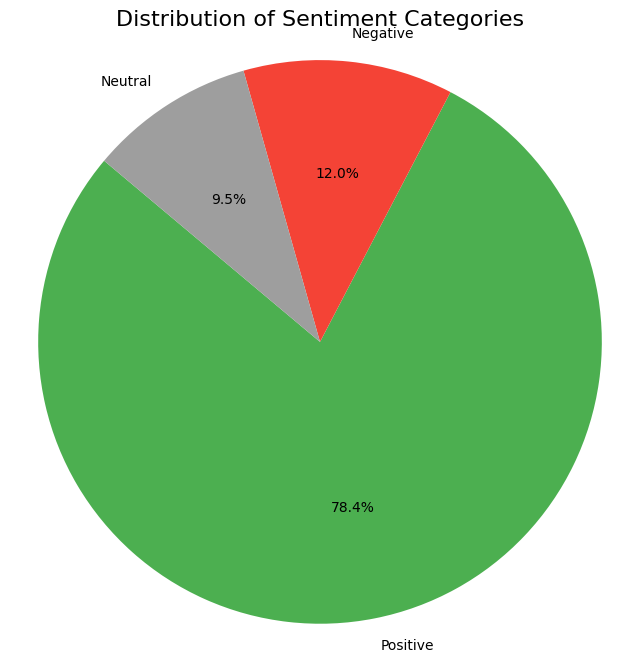

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Load the data with sentiment analysis results ---
filename = 'google_play_data_with_sentiment.xlsx'
try:
    df = pd.read_excel(filename)

    # --- Step 2: Count the occurrences of each sentiment category ---
    sentiment_counts = df['sentiment_category'].value_counts()

    # --- Step 3: Plot the pie chart ---
    
    # Set the figure size for better readability
    plt.figure(figsize=(8, 8))
    
    # Define custom colors for the pie chart slices
    colors = ['#4CAF50', '#F44336', '#9E9E9E'] # Green for Positive, Red for Negative, Grey for Neutral

    # Create the pie chart
    plt.pie(sentiment_counts, 
            labels=sentiment_counts.index, 
            autopct='%1.1f%%', 
            startangle=140,
            colors=colors)

    # Add a title to the chart
    plt.title('Distribution of Sentiment Categories', fontsize=16)
    
    # Ensure the pie chart is a circle
    plt.axis('equal')  

    # Display the plot
    plt.show()

except FileNotFoundError:
    print(f"ERROR: The file '{filename}' was not found.")
    print("Please make sure you have run the previous sentiment analysis step successfully.")
except KeyError:
    print("ERROR: The column 'sentiment_category' was not found in the file.")

In [4]:

#!pip install scikit-learn *only run once

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Step 1: Load the preprocessed data ---
filename = 'google_play_data_with_sentiment.xlsx'
try:
    df = pd.read_excel(filename)
    
    # Drop rows where 'tokenized_text' might be empty after cleaning
    df.dropna(subset=['tokenized_text'], inplace=True)

    # --- Step 2: Prepare the text for the model ---
    # The TfidfVectorizer expects a list of strings, not a list of lists of words.
    # We need to join the tokens in 'tokenized_text' back into a single string for each row.
    # The .astype(str) is a safeguard against potential non-string data.
    df['text_for_modeling'] = df['tokenized_text'].astype(str).apply(lambda x: ' '.join(eval(x)))


    # --- Step 3: Vectorize the text data ---
    # We will use TF-IDF to convert our text into a matrix of numerical features.
    # max_df=0.95 ignores words that appear in more than 95% of documents (too common).
    # min_df=2 ignores words that appear in fewer than 2 documents (too rare).
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['text_for_modeling'])


    # --- Step 4: Apply NMF for Topic Modeling ---
    num_topics = 5
    
    # Create and fit the NMF model
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(tfidf_matrix)


    # --- Step 5: Display the topics ---
    # Get the actual words from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    num_top_words = 10 # Number of top words to display for each topic
    
    print(f"Discovered {num_topics} topics:\n")

    for topic_idx, topic in enumerate(nmf_model.components_):
        # Get the top words for this topic
        top_words_indices = topic.argsort()[-num_top_words:][::-1]
        top_words = [feature_names[i] for i in top_words_indices]
        
        print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

except FileNotFoundError:
    print(f"ERROR: The file '{filename}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Discovered 5 topics:

Topic #1: good, product, quality, experience, service, products, myntra, delivery, price, aap
Topic #2: nice, product, experience, quality, aap, products, app, service, platform, comfortable
Topic #3: app, shopping, great, love, myntra, amazing, online, awesome, worst, shoping
Topic #4: best, shopping, quality, product, experience, online, myntra, products, platform, price
Topic #5: excellent, product, experience, service, quality, myntra, products, delivery, awesome, amazing


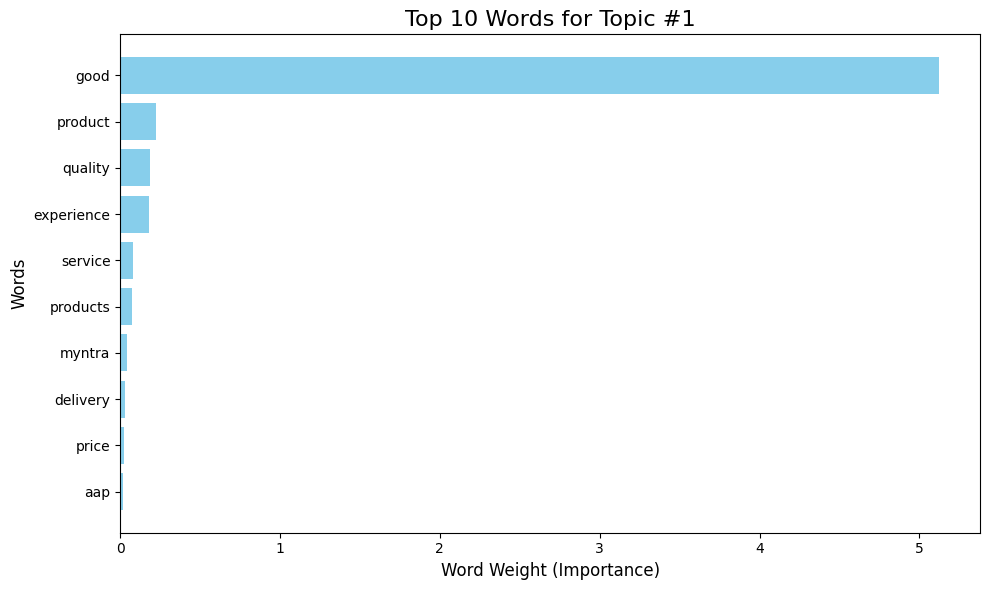

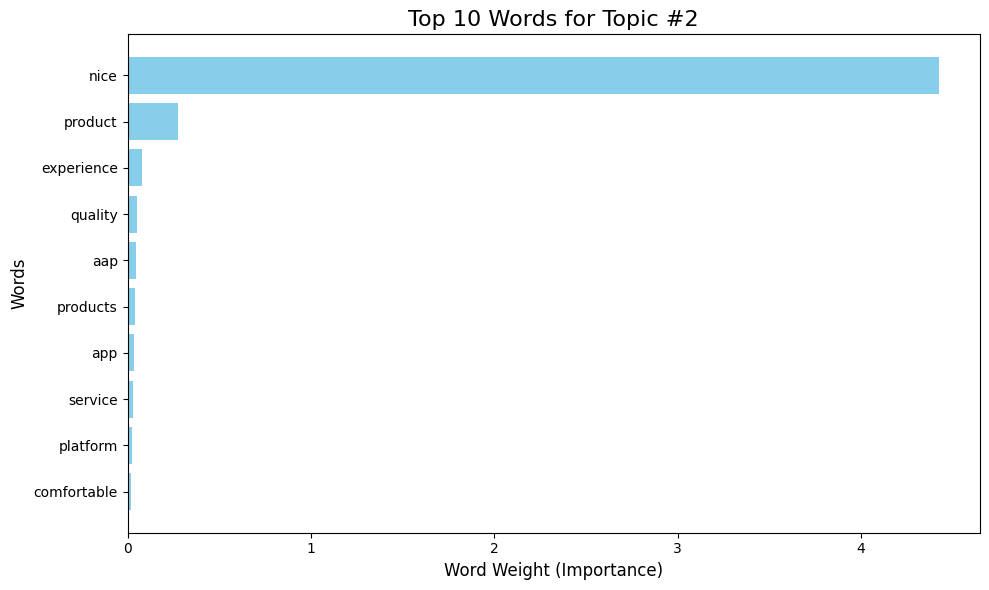

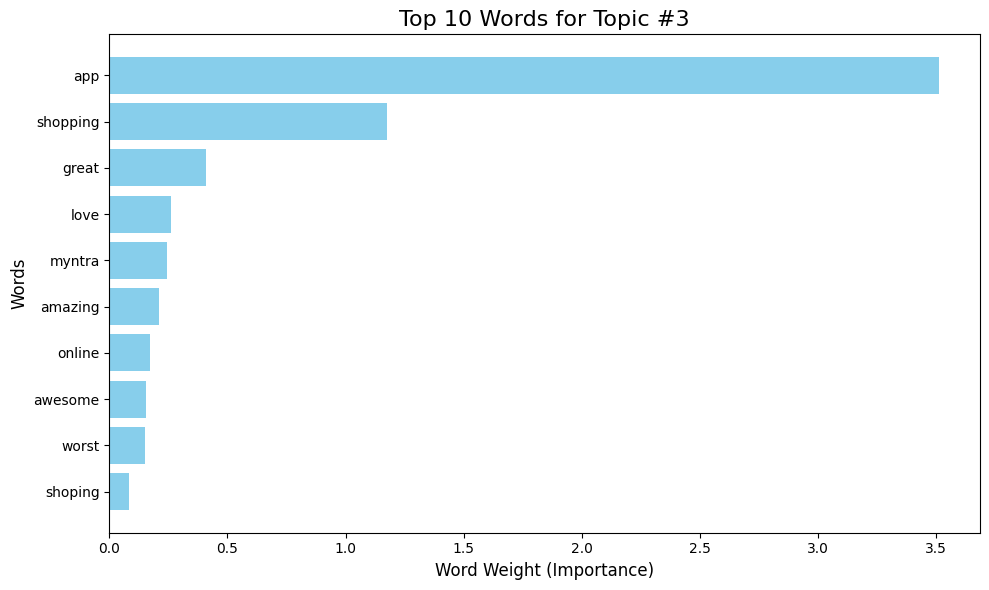

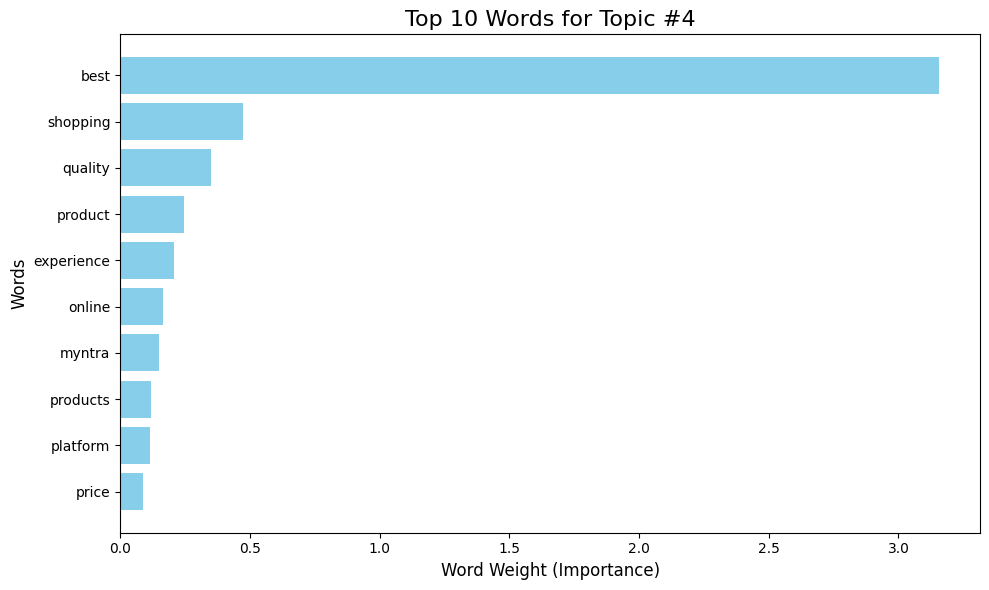

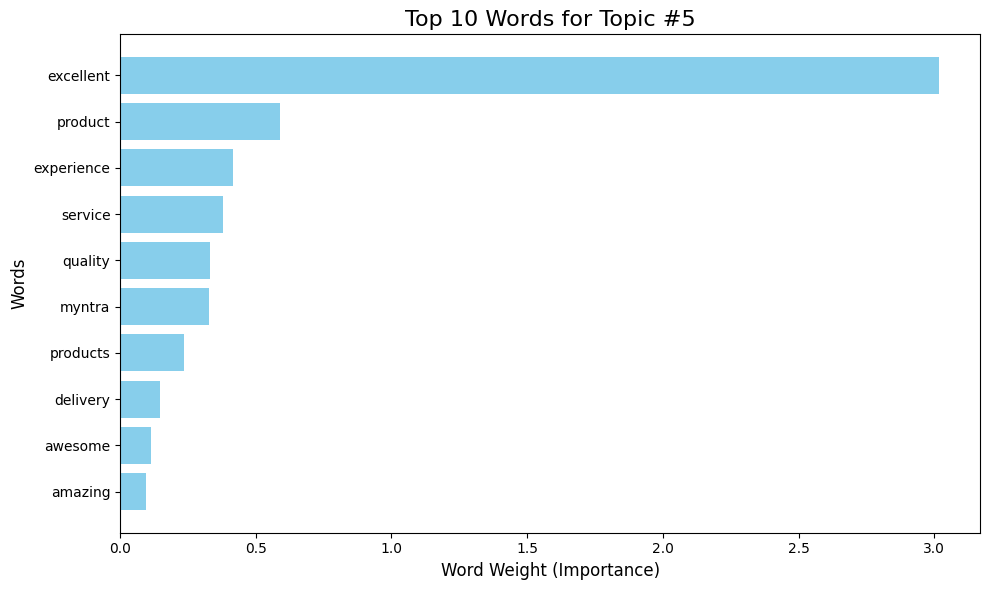

In [21]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# --- Step 1: Load the preprocessed data ---
filename = 'google_play_data_with_sentiment.xlsx'
try:
    df = pd.read_excel(filename)
    df.dropna(subset=['tokenized_text'], inplace=True)
    df['text_for_modeling'] = df['tokenized_text'].astype(str).apply(lambda x: ' '.join(eval(x)))

    # --- Step 2: Vectorize and run NMF (same as before) ---
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['text_for_modeling'])

    num_topics = 5
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(tfidf_matrix)
    feature_names = vectorizer.get_feature_names_out()

    # --- Step 3: Create a bar chart for each topic ---
    num_top_words = 10

    # Loop through each topic
    for topic_idx, topic in enumerate(nmf_model.components_):
        
        # Get the top words and their weights for the current topic
        top_words_indices = topic.argsort()[-num_top_words:][::-1]
        top_words = [feature_names[i] for i in top_words_indices]
        top_weights = [topic[i] for i in top_words_indices]

        # Create the plot
        plt.figure(figsize=(10, 6))
        
        # Create a horizontal bar chart
        plt.barh(top_words, top_weights, color='skyblue')
        
        # Invert the y-axis to have the most important word at the top
        plt.gca().invert_yaxis()
        
        # Add titles and labels
        plt.title(f'Top {num_top_words} Words for Topic #{topic_idx + 1}', fontsize=16)
        plt.xlabel('Word Weight (Importance)', fontsize=12)
        plt.ylabel('Words', fontsize=12)
        
        # Ensure the layout is tight
        plt.tight_layout()
        
        # Display the plot
        plt.show()

except FileNotFoundError:
    print(f"ERROR: The file '{filename}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [8]:
#!pip install wordcloud *only run once

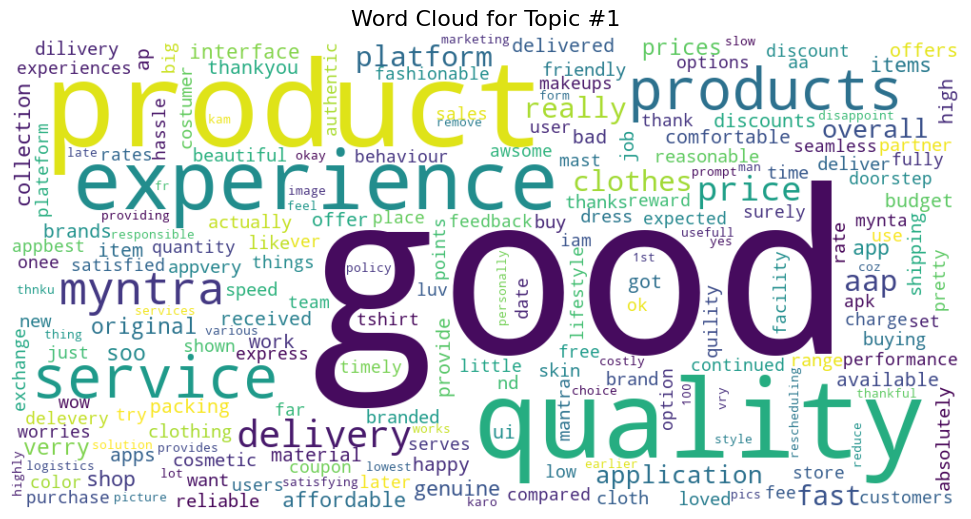

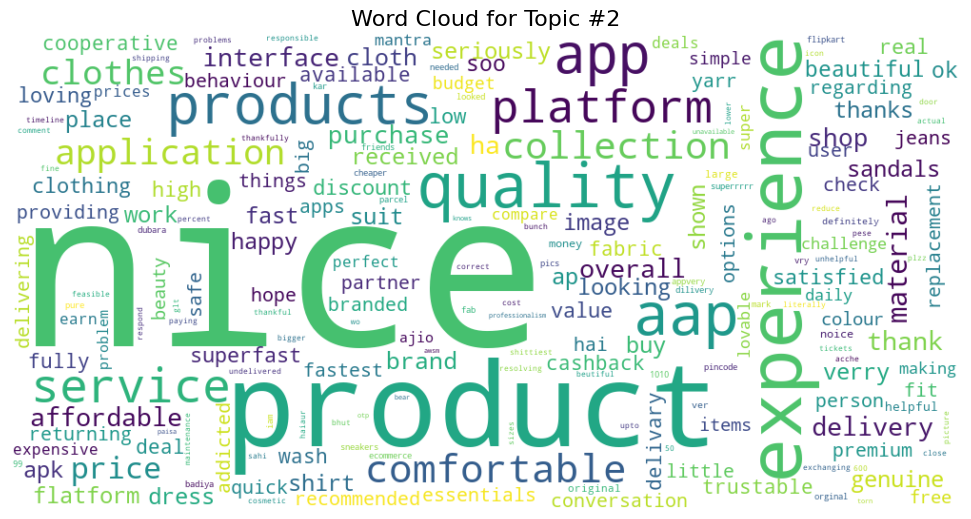

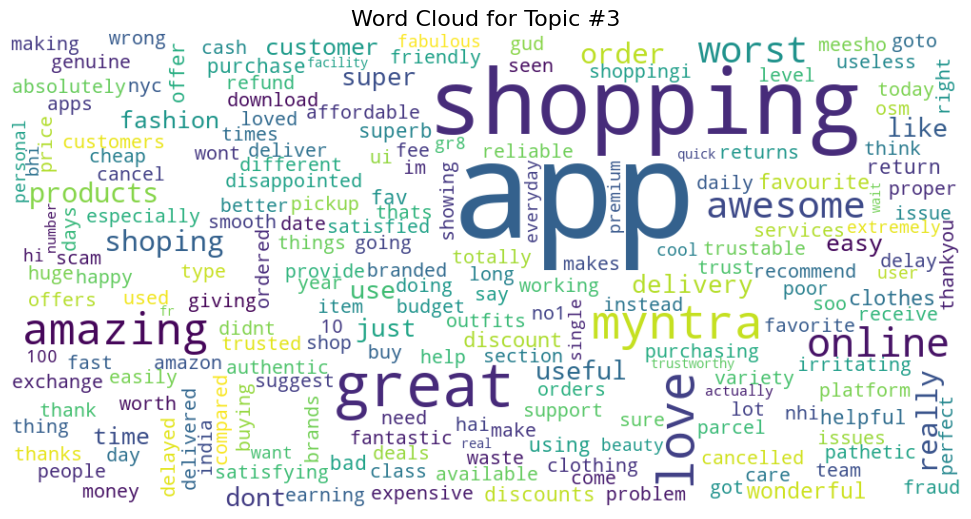

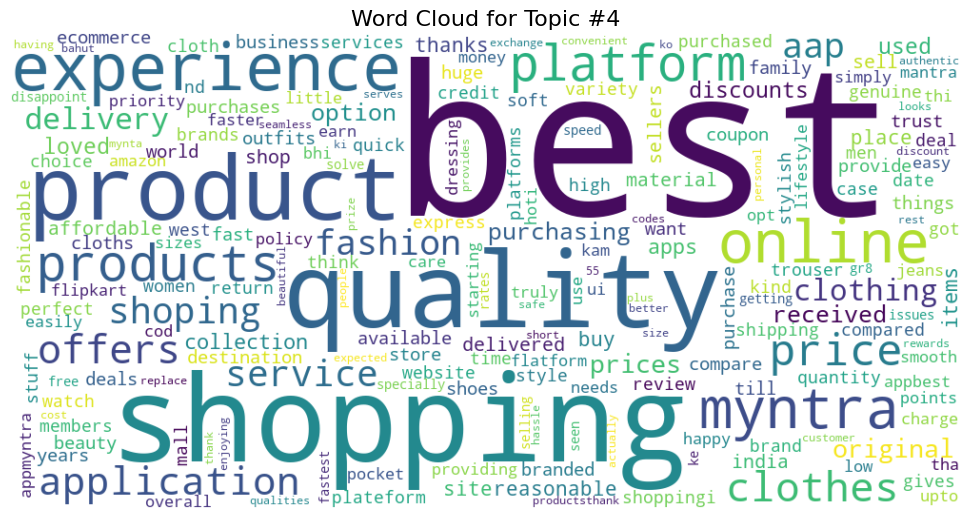

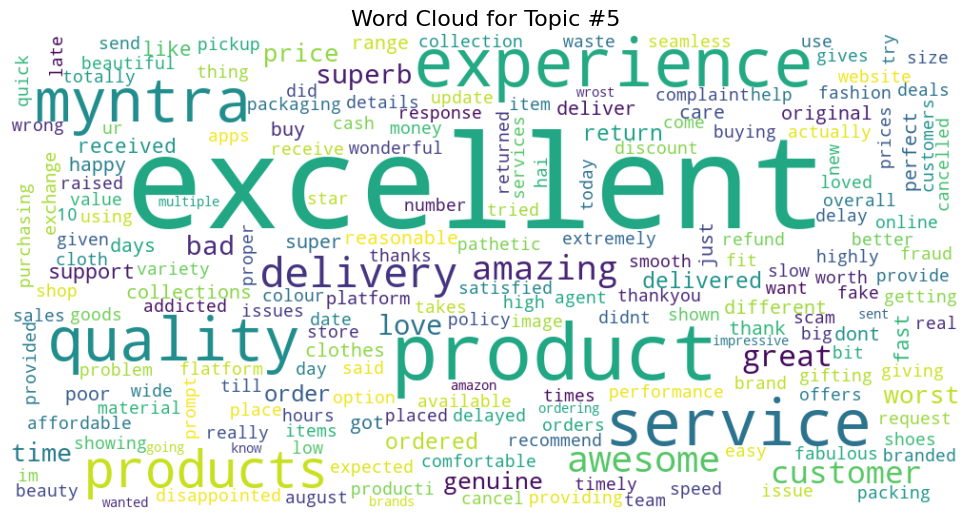

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud

# --- Step 1: Load the preprocessed data ---
filename = 'google_play_data_with_sentiment.xlsx'
try:
    df = pd.read_excel(filename)
    df.dropna(subset=['tokenized_text'], inplace=True)
    df['text_for_modeling'] = df['tokenized_text'].astype(str).apply(lambda x: ' '.join(eval(x)))

    # --- Step 2: Vectorize and run NMF (same as before) ---
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['text_for_modeling'])

    num_topics = 5
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(tfidf_matrix)
    feature_names = vectorizer.get_feature_names_out()

    # --- Step 3: Create a word cloud for each topic ---

    # Loop through each topic
    for topic_idx, topic in enumerate(nmf_model.components_):
        
        # Create a dictionary of words and their weights for the current topic
        # The WordCloud object works best with a dictionary of frequencies
        topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}

        # Create the WordCloud object
        wordcloud = WordCloud(width=1000, 
                              height=500, 
                              background_color='white',
                              colormap='viridis'
                             ).generate_from_frequencies(topic_words)

        # Create the plot
        plt.figure(figsize=(10, 5))
        
        # Display the generated image
        plt.imshow(wordcloud, interpolation='bilinear')
        
        # Add a title
        plt.title(f'Word Cloud for Topic #{topic_idx + 1}', fontsize=16)
        
        # Remove the axes for a cleaner look
        plt.axis("off")
        
        # Ensure the layout is tight
        plt.tight_layout(pad=0)
        
        # Display the plot
        plt.show()

except FileNotFoundError:
    print(f"ERROR: The file '{filename}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")